In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

In [2]:
def hypergeom(K, N, n, k):
    return binom(K, k) * binom(N - K, n - k) / binom(N, n)


def posterior_prob(N_vals, K, n, k, prior):
    likelihood = np.array([hypergeom(K, N, n, k) for N in N_vals])
    posterior = likelihood * prior
    return posterior, likelihood


k = 10
K = 100
n = 60
N_vals = np.arange(K, 2500)
prior_flat = 2
posterior, likelihood = posterior_prob(N_vals, K, n, k, prior_flat)

Text(0.5, 1.0, 'Posterior for N')

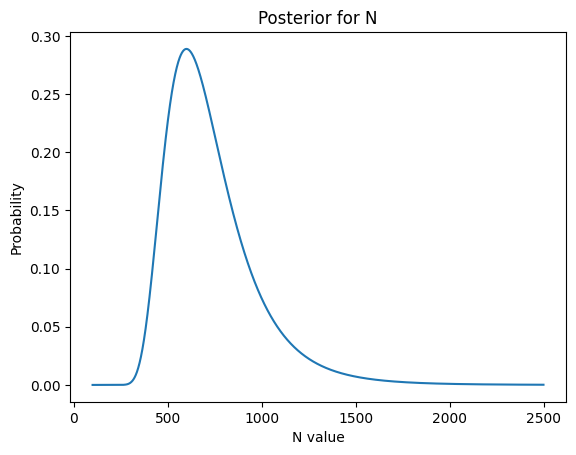

In [3]:
plt.plot(N_vals, posterior)
plt.ylabel("Probability")
plt.xlabel("N value")
plt.title("Posterior for N")

In [4]:
k1 = 15
posterior1, likelihood1 = posterior_prob(N_vals, K, n, k1, prior_flat)

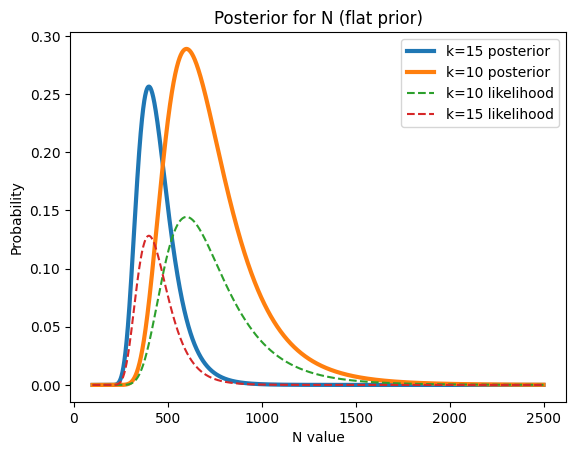

In [5]:
plt.plot(N_vals, posterior1, label="k=15 posterior", lw=3)
plt.plot(N_vals, posterior, label="k=10 posterior", lw=3)
plt.plot(N_vals, likelihood, "--", label="k=10 likelihood")
plt.plot(N_vals, likelihood1, "--", label="k=15 likelihood")
plt.ylabel("Probability")
plt.xlabel("N value")
plt.title("Posterior for N (flat prior)")
plt.legend()

In [6]:
prior_inv = 1 / N_vals
posterior2, likelihood2 = posterior_prob(N_vals, K, n, k, prior_inv)
posterior3, likelihood3 = posterior_prob(N_vals, K, n, k1, prior_inv)

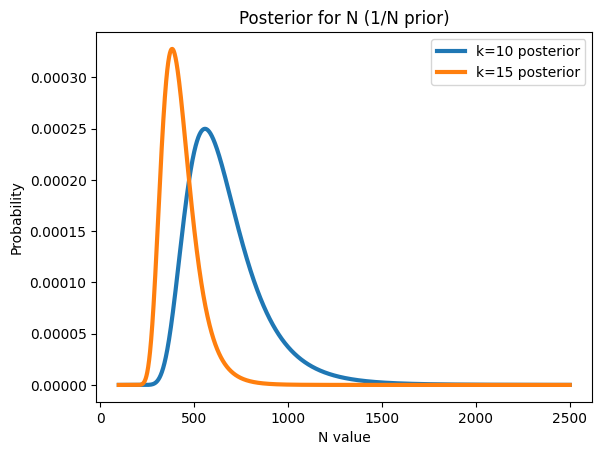

In [10]:
plt.plot(N_vals, posterior2, label="k=10 posterior", lw=3)
plt.plot(N_vals, posterior3, label="k=15 posterior", lw=3)
# plt.plot(N_vals, likelihood2, '--', label="k=10 likelihood")
# plt.plot(N_vals, likelihood3, '--', label="k=15 likelihood")
plt.ylabel("Probability")
plt.xlabel("N value")
plt.title("Posterior for N (1/N prior)")
plt.legend()

In [56]:
def gauss(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-((x - mu) ** 2) / (2 * sigma**2))


fish_space_mean = 10
fish_space_std = 1
lake_vol_mean = 5000
lake_vol_std = 300
mu = lake_vol_mean / fish_space_mean
sigma = np.sqrt(
    (lake_vol_std / fish_space_mean) ** 2
    + (lake_vol_mean / fish_space_mean**2 * fish_space_std) ** 2
)
K2 = 50
n2 = 30
k2 = 4
k3 = 8
N_vals1 = np.arange(K2, 1200)
prior_gauss = gauss(N_vals1, mu, sigma)
posterior4, likelihood4 = posterior_prob(N_vals1, K2, n2, k2, prior_gauss)
posterior5, likelihood5 = posterior_prob(N_vals1, K2, n2, k3, prior_gauss)

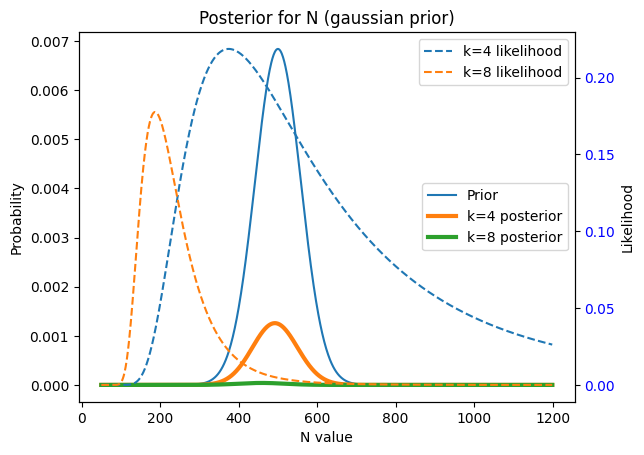

In [57]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(N_vals1, prior_gauss, label="Prior")
ax1.plot(N_vals1, posterior4, label="k=4 posterior", lw=3)
ax1.plot(N_vals1, posterior5, label="k=8 posterior", lw=3)
ax2.plot(N_vals1, likelihood4, "--", label="k=4 likelihood")
ax2.plot(N_vals1, likelihood5, "--", label="k=8 likelihood")
ax1.set_ylabel("Probability")
ax1.set_xlabel("N value")
ax1.set_title("Posterior for N (gaussian prior)")
ax2.tick_params(axis="y", labelcolor="blue")
ax2.set_ylabel("Likelihood")
ax1.legend(loc="center right")
ax2.legend(loc="upper right")

In [58]:
estimate_bayes3 = N_vals[np.argmax(posterior4)]
estimate_bayes4 = N_vals[np.argmax(posterior5)]
estimate_like3 = N_vals[np.argmax(likelihood4)]
estimate_like4 = N_vals[np.argmax(likelihood5)]
print(f"Best estimate of N for k=4 (Bayesian) {estimate_bayes3}")
print(f"Best estimate of N for k=8 (Bayesian) {estimate_bayes4}")
print(f"Best estimate of N for k=4 (Likelihood) {estimate_like3}")
print(f"Best estimate of N for k=8 (Likelihood) {estimate_like4}")

Best estimate of N for k=4 (Bayesian) 542
Best estimate of N for k=8 (Bayesian) 508
Best estimate of N for k=4 (Likelihood) 425
Best estimate of N for k=8 (Likelihood) 237
